In [6]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
u = sym.Symbol('u', real=True)
sigma = sym.Symbol('sigma', real=True)
x = sym.Symbol('x', real=True)

In [8]:
pi = np.pi

In [9]:
gauss_distribution = (1/(sigma*np.sqrt(2*pi)))*sym.exp(-1*((x-u)**2)/(2*sigma**2))

In [10]:
gauss_distribution

0.398942280401433*exp(-(-u + x)**2/(2*sigma**2))/sigma

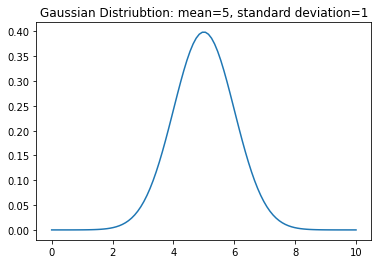

In [11]:
mean = 5
std = 1
X = np.linspace(mean-5,mean+5,100)
Y = []
G = gauss_distribution.subs([(u,mean),(sigma,std)])
for i in X:
    Y.append(G.evalf(subs={x:i}))

plt.plot(X,Y)
plt.title(f'Gaussian Distriubtion: mean={mean}, standard deviation={std}')
plt.show()

In [12]:
poiss_distribution = (u**x)*sym.exp(-1*u)/sym.factorial(x)
print(poiss_distribution)

u**x*exp(-u)/factorial(x)


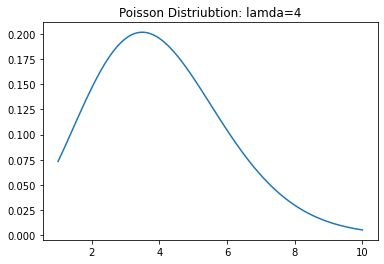

In [13]:
lam = 4
X = np.linspace(lam-3,lam+6,100)
Y = []
P = poiss_distribution.subs(u,lam)
for i in X:
    Y.append(P.evalf(subs={x:i}))

plt.plot(X,Y)
plt.title(f'Poisson Distriubtion: lamda={lam}')
plt.show()

In [14]:
def joint_probability(data, distribution):
    P = 1
    for i in range(len(data)):
        xi = data[i]
        pi = distribution.subs(x,xi)
        P = P*pi
    return P

def get_max(F, y):
    m = sym.solveset(sym.Eq(sym.diff(F,y), 0), y)
    return abs(m.args[0])

def plot_MLE_distribution(data, distribution, var):
    """Plots the MLE distribution and returns the value of the maximum liklihood estimate"""
    P = joint_probability(data, distribution)
    #check these values here for periodicity
    G = distribution
    for i in range(len(var)):
        v = var[i]
        V = get_max(P, v)
        P = P.subs(v,V)
        G = G.subs(v,V)

    s = max(data)-min(data)
    X = np.linspace(min(data)-s, max(data)+s,50)
    Y = []
    for i in X:
        Y.append(G.evalf(subs={x:i}))

    m = X[Y.index(max(Y))]

    plt.plot(X,Y)
    plt.scatter(data,np.zeros(len(data)), marker='o', c='red')
    plt.scatter(m,0, marker='x', c='green')
    plt.title('Maximum Liklihood estimation')
    plt.show()
    
    return m

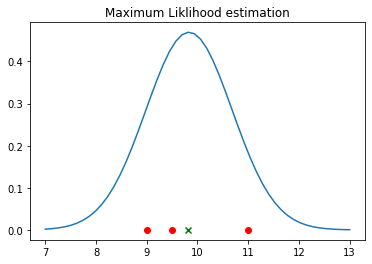

9.816326530612244


In [15]:
data = [9,9.5,11]
m = plot_MLE_distribution(data, gauss_distribution, [u, sigma]) 
print(m)

In [16]:
def norm_data(N, mean, std):
    data = []
    for i in range(30):
        data.append(np.random.normal(loc=mean, scale=std))
    return data

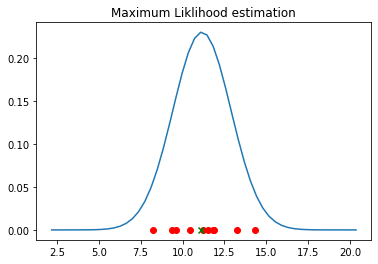

11.087848800162089
Absolute error:  121.757 %


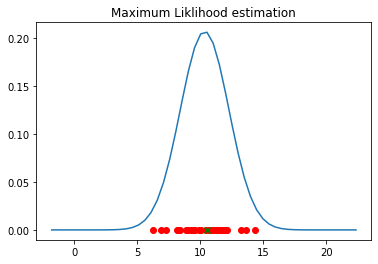

10.525411021959922
Absolute error:  110.508 %


In [17]:
data = norm_data(25,10,2)

m = plot_MLE_distribution(data[:10], gauss_distribution, [u, sigma])
print(m)
print('Absolute error: ', round((abs(mean-m)/mean)*100, 3), '%')

m = plot_MLE_distribution(data, gauss_distribution, [u, sigma])
print(m)
print('Absolute error: ', round((abs(mean-m)/mean)*100, 3), '%')

In [18]:
#practice run for quantum walk 
p0 = sym.sin(x)**2
p1 = sym.cos(x)**2
X = np.linspace(0,pi,100)
Y0, Y1 = [], []
for i in X:
    Y0.append(p0.evalf(subs={x:i}))
    Y1.append(p1.evalf(subs={x:i}))

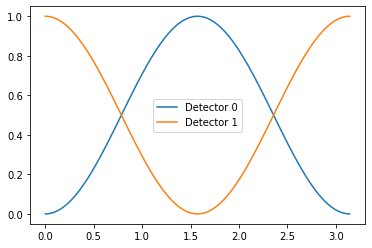

In [19]:
plt.plot(X,Y0, label='Detector 0')
plt.plot(X,Y1, label='Detector 1')
plt.legend()
plt.show()

In [20]:
#choose x = pi/4 for p0(x) = p1(x) = 1/2
#choose x = pi/2 for po(x) = 1, p1(x) = 0
n = 100 #no trails
m0,m1 = 0,0
g = 3*pi/4
for i in range(n):
    d = np.random.choice([0,1], p=[p0.evalf(subs={x:g}),p1.evalf(subs={x:g})])
    if d == 0:
        m0 += 1
    else:
        m1 += 1
print((m0,m1))

(45, 55)


In [21]:
#defining the mlf function
MLF = (p0**m0)*(p1**m1)

In [22]:
MLF

sin(x)**90*cos(x)**110

In [23]:
sym.diff(MLF,x)

-110*sin(x)**91*cos(x)**109 + 90*sin(x)**89*cos(x)**111

In [24]:
guess = sym.solve(sym.diff(MLF,x), x)
print(guess)

[0, -pi/2, pi/2, -2*atan(sqrt(31 - 4*sqrt(55))/3), 2*atan(sqrt(31 - 4*sqrt(55))/3), -2*atan(sqrt(4*sqrt(55) + 31)/3), 2*atan(sqrt(4*sqrt(55) + 31)/3)]


In [25]:
for i in range(len(guess)):
    guess[i] = guess[i].evalf()
print(guess)

[0, -1.57079632679490, 1.57079632679490, -0.735314452816668, 0.735314452816668, -2.40627820077312, 2.40627820077312]


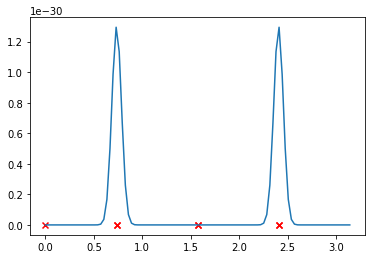

In [26]:
#assume a gaussian distribution for guessing 
for i in range(len(guess)):
    guess[i] = abs(guess[i].evalf())
    plt.scatter(guess[i],0, marker='x', c='red')

X = np.linspace(0,pi,100)
Y = []
for i in X:
    Y.append(MLF.evalf(subs={x:i}))

plt.plot(X,Y)
plt.show()

In [27]:
def probs_plot(P,mx):
    X = np.linspace(0,mx,200)
    for i in range(len(P)):
        Y = []
        for j in X:
            Y.append(sym.re(P[i].evalf(subs={x:j})))
        plt.plot(X,Y, label=f'Node {i}')
    plt.title('Probability distribution')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def produce_data(P,n,g):
    """Function that produces data for n measurements with parameter = g, and P is an array of probabilities for each node. Returns the number of measurements on each node."""
    N = len(P)
    Pe = np.zeros(N)
    for i in range(N):
        Pe[i] = sym.re(P[i].evalf(subs={x:g}))
    nodes = np.arange(N)
    M = np.zeros(N)
    for i in range(n):
        d = np.random.choice(nodes, p=Pe)
        M[d] += 1
    return M 

def MLF(P,M):
    mlf = 1
    for i in range(len(P)):
        mlf = mlf*(P[i]**int(M[i]))
    return mlf

def MLF_plot(mlf,int0,int1,N):
    guess = sym.solve(sym.diff(mlf,x), x)
    for i in range(len(guess)):
        guess[i] = abs(guess[i].evalf())
        plt.scatter(guess[i],0, marker='x', c='red')

    X = np.linspace(int0,int1,100)
    Y = []
    for i in X:
        Y.append(sym.re(mlf.evalf(subs={x:i})))
    plt.plot(X,Y, label=N)
    return X,Y

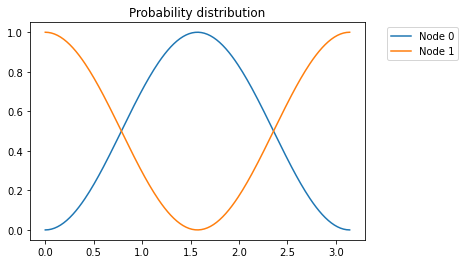

[60. 40.]


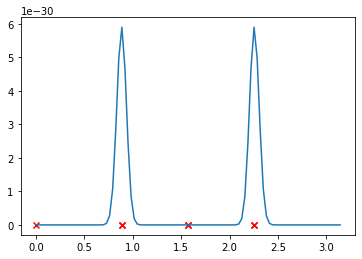

In [28]:
P = [p0,p1]
probs_plot(P,pi)
n = 100
int0 = 0
int1 = pi
g = pi/4
M = produce_data(P,n,g)
print(M)
mlf = MLF(P,M)
X,Y = MLF_plot(mlf,int0,int1,n)

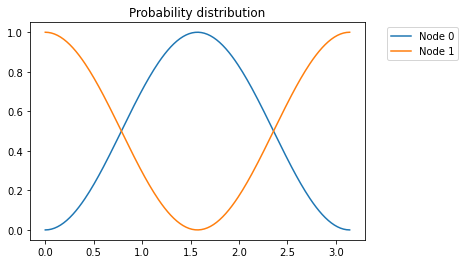

In [29]:
P = [-0.5*sym.cos(2.0*x) + 0.5, 0.5*sym.cos(2.0*x) + 0.5]
probs_plot(P,pi)

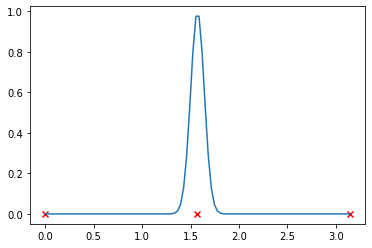

In [30]:
n = 100
int0 = 0
int1 = pi
set_x = 1.5
M = produce_data(P,n,set_x)
mlf = MLF(P,M)
X,Y = MLF_plot(mlf,int0,int1,n)

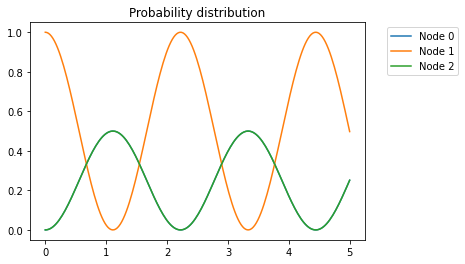

In [39]:
int0 = 0
int1 = 5
set_x = 0.5

cos = sym.cos
P = [-0.25*cos(2.8284271247462*x) + 0.25,
0.5*cos(2.8284271247462*x) + 0.5,
-0.25*cos(2.8284271247462*x) + 0.25]
probs_plot(P,int1)

In [32]:
green = P[2]
period = sym.solve(green, x)
print(period)

[0.0, 2.22144146907918]


In [33]:
orange = P[1]
period = sym.solve(sym.Eq(orange,1), x)
print(period)

[0.0, 2.22144146907918]


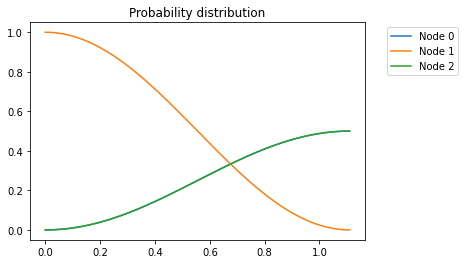

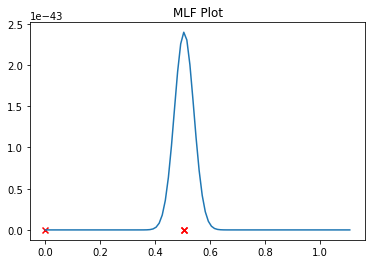

In [40]:
period = 2.22/2
probs_plot(P,period)

M = produce_data(P,n,set_x)
mlf = MLF(P,M)
X,Y = MLF_plot(mlf,int0,period,n)
plt.title('MLF Plot')
plt.show()

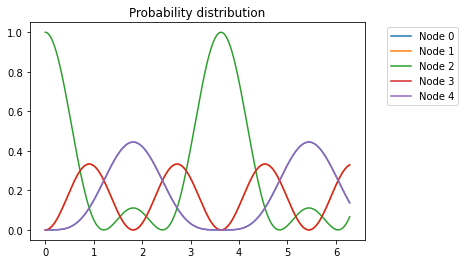

In [37]:
exp = sym.exp
t = x
I = 1j

n = 100
int0 = 0
int1 = 2*pi
set_x = pi/4

P = [-0.111111111111111*exp(1.73205080756888*I*t) + 0.0277777777777778*exp(3.46410161513776*I*t) + 0.166666666666667 + 0.0277777777777778*exp(-3.46410161513776*I*t) - 0.111111111111111*exp(-1.73205080756888*I*t),

-0.166666666666667*cos(3.46410161513776*t) + 0.166666666666667,

0.222222222222222*exp(1.73205080756888*I*t) + 0.111111111111111*exp(3.46410161513776*I*t) + 0.333333333333333 + 0.111111111111111*exp(-3.46410161513776*I*t) + 0.222222222222222*exp(-1.73205080756888*I*t),

-0.166666666666667*cos(3.46410161513776*t) + 0.166666666666667,

-0.111111111111111*exp(1.73205080756888*I*t) + 0.0277777777777778*exp(3.46410161513776*I*t) + 0.166666666666667 + 0.0277777777777778*exp(-3.46410161513776*I*t) - 0.111111111111111*exp(-1.73205080756888*I*t),]
probs_plot(P,int1)

green = P[2]
period = sym.solve(sym.Eq(green,1), x)
print('green period: ', period)